# Ridge Regression Assignment


Let's look at a synthetic dataset consisting of 30 points drawn from $y = \cos(4x)$:

In [1]:
import turicreate
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval [0,1)

In [2]:
random.seed(98103)
n = 30
x = turicreate.SArray([random.random() for i in range(n)]).sort()
print(x)

[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]


Compute y

In [3]:
y = x.apply(lambda x: math.sin(4 * x))
print(y)

[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]


Add random Gaussian noise to y

In [4]:
random.seed(1)
e = turicreate.SArray([random.gauss(0, 1.0/3.0) for i in range(n)])
y = y + e
print(y)

[0.5870501910256387, 0.6486558513722105, 0.30780330948476986, 0.31074844741664676, 0.23740962549610656, 0.7050171572238372, 0.4617166769923188, 0.38326050785082555, 1.065176914291498, 1.031847069489963, 1.1340397144416507, 0.6460829679251624, 0.9430717327225886, 0.9028159665477785, 0.31406589001960095, 0.9390451220174663, 0.7586334475537929, 1.4099949798044635, 0.6496841484249276, 0.4842680676563489, 0.9374902532939589, 0.4046801938310186, 0.2836240244210624, -0.2216277264003625, -0.1020645281188296, 0.08545706817812293, -0.1609077841383484, -0.367647959398532, -0.8189624294692727, -0.37968361804843936]


### Put data into an SFrame to manipulate later

In [5]:
data = turicreate.SFrame({'X1': x, 'Y': y})
print(data)

+---------------------+---------------------+
|          X1         |          Y          |
+---------------------+---------------------+
| 0.03957894495006575 |  0.5870501910256387 |
| 0.04156809967912256 |  0.6486558513722105 |
|  0.0724319480800758 | 0.30780330948476986 |
|  0.1502890446221763 | 0.31074844741664676 |
| 0.16133414450223427 | 0.23740962549610656 |
| 0.19195631279497838 |  0.7050171572238372 |
| 0.23283391714465285 |  0.4617166769923188 |
| 0.25990098016580054 | 0.38326050785082555 |
|  0.3801458148686865 |  1.065176914291498  |
|  0.432444723507992  |  1.031847069489963  |
+---------------------+---------------------+
[30 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


### Create a function to plot the data, since we'll do it many times

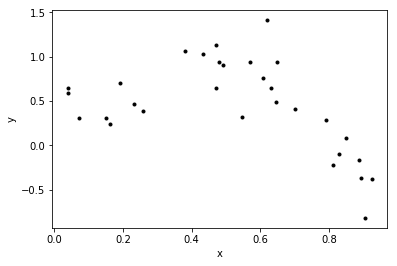

In [6]:
def plot_data(data):
    plt.plot(data['X1'], data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

## Define some useful polynomial regression functions

Define and test a function to create our features for a polynomial regression model of any degree:

In [7]:
def polynomial_features(data, deg):
    data_copy = data.copy()
    for i in range(1, deg):
        data_copy['X' + str(i + 1)] = data_copy['X' + str(i)] * data_copy['X1']
    return data_copy

# Example: Adding columns for x^2 and x^3
polynomial_features(data, 3)

X1,Y,X2,X3
0.03957894495006575,0.5870501910256387,0.0015664928833603355,6.20001355951885e-05
0.04156809967912256,0.6486558513722105,0.0017279069109334693,7.18258067099272e-05
0.0724319480800758,0.30780330948476986,0.0052463871026747965,0.0003800060382289202
0.1502890446221763,0.31074844741664676,0.022586796933446496,0.003394548132202775
0.16133414450223427,0.23740962549610656,0.026028706182267807,0.004199319044416193
0.19195631279497838,0.7050171572238372,0.03684722602184358,0.007073057643876273
0.23283391714465285,0.4617166769923188,0.054211632972923064,0.012622306859893899
0.25990098016580054,0.38326050785082555,0.06754851949114385,0.01755592642449697
0.3801458148686865,1.065176914291498,0.14451084056217767,0.05493519124286786
0.432444723507992,1.031847069489963,0.18700843888990365,0.0808708126494056


Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":

In [8]:
def polynomial_regression(data, deg):
    model = turicreate.linear_regression.create(polynomial_features(data, deg),
                                                target='Y',
                                                l2_penalty=0.,
                                                l1_penalty=0.,
                                                validation_set=None,
                                                verbose=False)    
    
    return model

Define function to plot data and predictions made, since we are going to use it many times.

In [9]:
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value']) - 1

    # Create 200 points in the x axis and compute the predicted value for each point
    x_pred = turicreate.SFrame({'X1': [i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, deg))

    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-',  label='degree {} fit'.format(deg))
    plt.legend(loc='upper left')
    plt.axis([0, 1, -1.5, 2])
   

Create a function that prints the polynomial coefficients in a pretty way :)

In [10]:
def print_coefficients(model):  
    # Get the degree of the polynomial
    deg = len(model.coefficients['value']) - 1

    # Get learned parameters as a list
    beta = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print('Learned polynomial for degree {}:'.format(deg))
    beta.reverse()
    print(numpy.poly1d(beta))
 

## Fit a degree-2 polynomial

Fit our degree-2 polynomial to the data generated above:

In [11]:
model = polynomial_regression(data, deg=2)

print coefficents of the degree-2 modle and inspect learned parameters

In [12]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


Form and plot our predictions along a grid of x values:

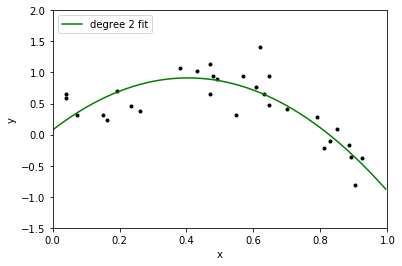

In [13]:
plot_poly_predictions(data, model)

## Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


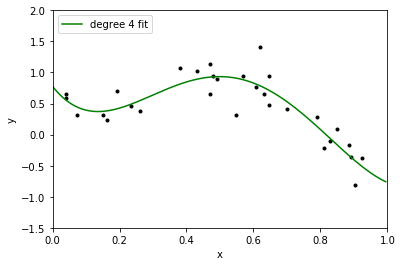

In [14]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data, model)

## Fit a degree-16 polynomial

In [15]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15             14             13
2.643e+06 x  - 1.036e+07 x  + 1.151e+07 x  + 6.987e+06 x 
              12             11             10             9
 - 2.659e+07 x  + 2.148e+07 x  - 5.181e+06 x  + 3.959e+06 x
              8             7             6             5             4
 - 1.316e+07 x + 1.537e+07 x - 9.448e+06 x + 3.496e+06 x - 8.048e+05 x
             3        2
 + 1.13e+05 x - 9045 x + 357.4 x - 4.701


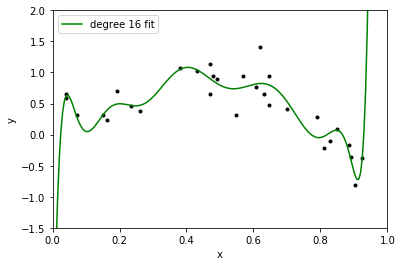

In [16]:
plot_poly_predictions(data,model)

# Ridge Regression

Define our function to solve the ridge objective for a polynomial regression model of any degree:

In [17]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = turicreate.linear_regression.create(polynomial_features(data, deg),
                                                target='Y', l2_penalty=l2_penalty,
                                                validation_set=None, verbose=False)
    return model

## Perform a ridge fit of a degree-16 polynomial using a *very* small penalty strength

l2_penalty=1e-25

In [18]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
           16             15             14             13
2.643e+06 x  - 1.036e+07 x  + 1.151e+07 x  + 6.987e+06 x 
              12             11             10             9
 - 2.659e+07 x  + 2.148e+07 x  - 5.181e+06 x  + 3.959e+06 x
              8             7             6             5             4
 - 1.316e+07 x + 1.537e+07 x - 9.448e+06 x + 3.496e+06 x - 8.048e+05 x
             3        2
 + 1.13e+05 x - 9045 x + 357.4 x - 4.701


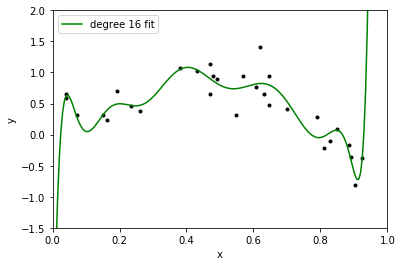

In [19]:
plot_poly_predictions(data, model)

## Perform a ridge fit of a degree-16 polynomial using a very large penalty strength
l2_penalty=100

In [20]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=100)
print_coefficients(model)

Learned polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


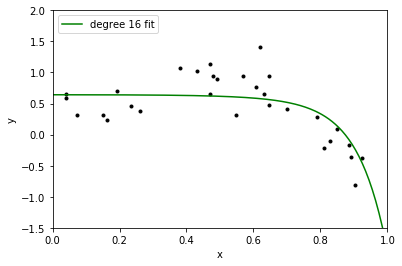

In [21]:
plot_poly_predictions(data,model)

## find fits for a sequence of increasing lambda values, for each fit print coefficients and plot predictions

lambda = 1e-25
Learned polynomial for degree 16:
           16             15             14             13
2.643e+06 x  - 1.036e+07 x  + 1.151e+07 x  + 6.987e+06 x 
              12             11             10             9
 - 2.659e+07 x  + 2.148e+07 x  - 5.181e+06 x  + 3.959e+06 x
              8             7             6             5             4
 - 1.316e+07 x + 1.537e+07 x - 9.448e+06 x + 3.496e+06 x - 8.048e+05 x
             3        2
 + 1.13e+05 x - 9045 x + 357.4 x - 4.701


lambda = 1e-10
Learned polynomial for degree 16:
           16            15             14             13
4.974e+04 x  - 7.82e+04 x  - 2.266e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3076 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1439 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.2 x - 65.19 x + 2.159


lambda = 1e-06
Learned polynomial for

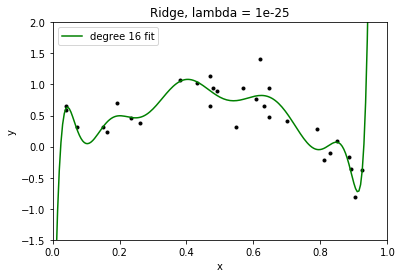

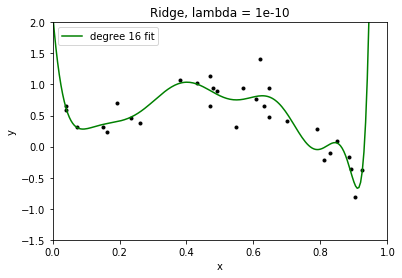

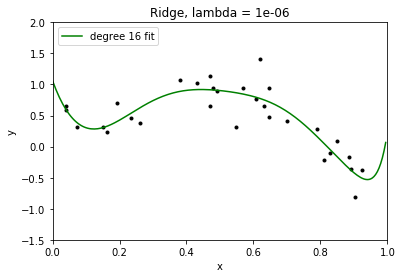

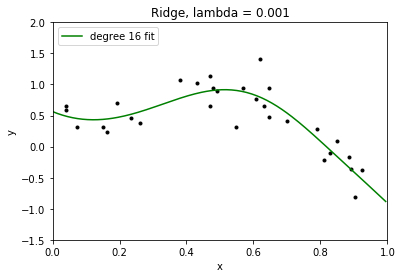

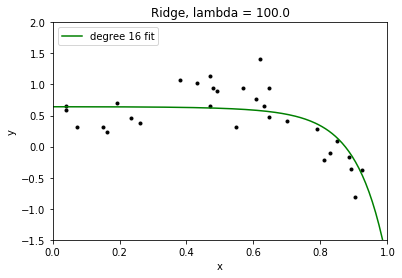

In [22]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=16, l2_penalty=l2_penalty)
    print('lambda = ' + str(l2_penalty))
    print_coefficients(model)
    print('\n')
    plt.figure()
    plot_poly_predictions(data, model)
    plt.title('Ridge, lambda = ' + str(l2_penalty))

## implement Leave one out validation method.

In [23]:
import turicreate_cross_validation.cross_validation as tcv

# LOO cross validation -- return the average MSE and the best l2 penalty value
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)

    folds = [fold for fold in tcv.KFold(tcv.shuffle_sframe(data, 98103), len(data))]

    mse = None
    new_l2_penalty = None
    l2_penalty_mse = []
    for l2_penalty in l2_penalty_values:
        # We are going to be continuously updating this value throughout our loop.
        # It will later represent out new value that we will then add to out l2 list.
        new_mse = 0.0
        for training_data, validation_set in folds:
            model = turicreate.linear_regression.create(training_data, target='Y', l2_penalty=l2_penalty,
                                                        validation_set=None, verbose=False)
            # Recall that for linear regression, it is (actual - predicted)^2 each iteration,
            # for our cost function.
            y_test_predicted = model.predict(validation_set)
            new_mse += ((validation_set['Y'] - y_test_predicted)**2).sum()
        new_mse /= len(data)
        l2_penalty_mse.append(new_mse)

        if mse is None or new_mse < mse:
            mse = new_mse
            best_l2_penalty = l2_penalty
    return l2_penalty_mse, new_l2_penalty

Run LOO cross validation for "num" values of lambda, on a log scale for degree-16 polynomial

In [24]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)
print(l2_penalty_mse)
print(best_l2_penalty)

[0.12595084968777492, 0.10028936628987864, 0.08274685851993192, 0.10535836337232458, 0.12943491467304286, 0.25878646764394236, 0.2740612061631873, 0.2745184673176902, 0.2745312174920882, 0.2745315722939207]
None


Plot results of estimating LOO for each value of lambda

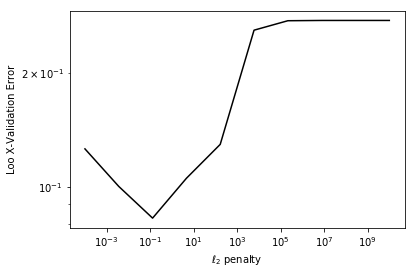

In [25]:
plt.plot(l2_penalty_values, l2_penalty_mse, 'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('Loo X-Validation Error')
plt.xscale('log')
plt.yscale('log')

Find the value of lambda, $\lambda_{\mathrm{CV}}$, that minimizes the LOO cross validation error, and plot resulting fit

In [26]:
best_l2_penalty

In [55]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 16:
        16         15         14        13         12         11
-2.656 x  - 1.076 x  + 0.265 x  + 1.28 x  + 1.906 x  + 2.104 x 
          10         9          8         7         6         5
 + 1.856 x  + 1.176 x + 0.1234 x - 1.165 x - 2.413 x - 3.118 x
          4           3         2
 - 2.517 x + 0.01327 x + 3.077 x - 0.03913 x + 0.4248


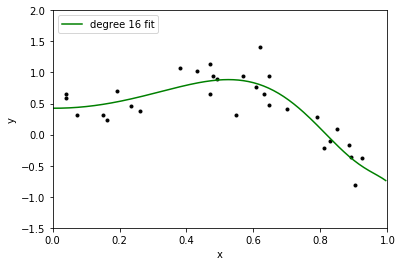

In [54]:
plot_poly_predictions(data,model)

Compare with linear regression degree-16 polynominal. How different are the coefficiets?

Learned polynomial for degree 16:
           16             15             14             13
2.643e+06 x  - 1.036e+07 x  + 1.151e+07 x  + 6.987e+06 x 
              12             11             10             9
 - 2.659e+07 x  + 2.148e+07 x  - 5.181e+06 x  + 3.959e+06 x
              8             7             6             5             4
 - 1.316e+07 x + 1.537e+07 x - 9.448e+06 x + 3.496e+06 x - 8.048e+05 x
             3        2
 + 1.13e+05 x - 9045 x + 357.4 x - 4.701


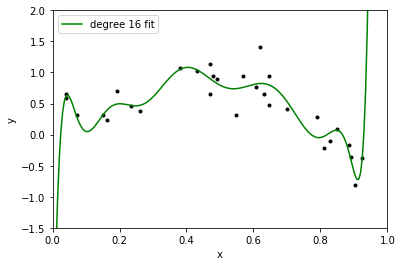

In [29]:
model = polynomial_regression(data, deg=16)
print_coefficients(model)
plot_poly_predictions(data,model)

Run LOO cross validation for "num" values of lambda, on a log scale for degree-16 polynomial

In [61]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)
print(l2_penalty_mse)
print(best_l2_penalty)

[0.12595084968777492, 0.10028936628987864, 0.08274685851993192, 0.10535836337232458, 0.12943491467304286, 0.25878646764394236, 0.2740612061631873, 0.2745184673176902, 0.2745312174920882, 0.2745315722939207]
None


Plot results of estimating LOO for each value of lambda

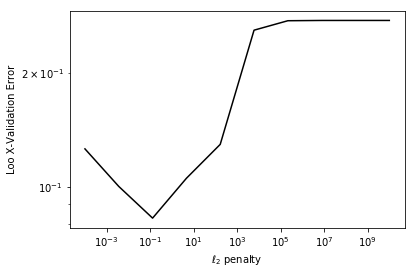

In [62]:
plt.plot(l2_penalty_values, l2_penalty_mse, 'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('Loo X-Validation Error')
plt.xscale('log')
plt.yscale('log')

Find the value of lambda, $\lambda_{\mathrm{CV}}$, that minimizes the LOO cross validation error, and plot resulting fit for degree-4 polynomial 

Learned polynomial for degree 4:
        4         3         2
-2.376 x - 2.512 x + 2.422 x + 0.6782 x + 0.3666


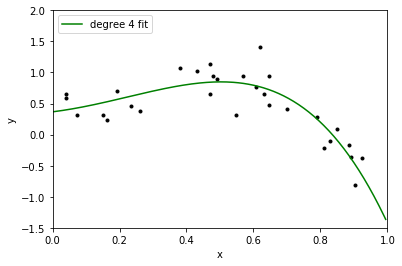

In [63]:
model = polynomial_ridge_regression(data, deg=4, l2_penalty=best_l2_penalty)
print_coefficients(model)
plot_poly_predictions(data,model)

Compare with linear regression degree-4 polynominal. How different are the coefficiets?


Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


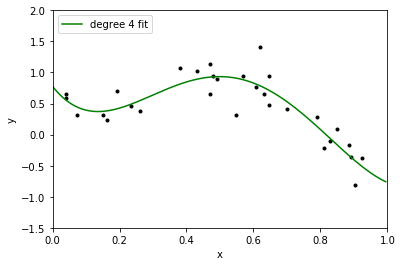

In [33]:
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

# Notes on comparison

The learned polynomial for degree 4 using regular linear regression has MUCH larger numbers!

The learned ploynomial for degree 4 using an l2 penality with lasso gives MUCH smaller numbers because we find the
lambda value that effectively minimizes the regression function. As our lambda value goes up, our polynomial X values go down $ :) $